<a href="https://colab.research.google.com/github/avneeshdubey99/GRIP-Internship/blob/main/Sol3_ExploratoryDataAnalysis_Retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Avneesh Dubey

#Exploratory Data Analysis - Retail

In [1]:
## Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import datasets
from sklearn.cluster import KMeans
import os #as you are importing a file from your personal system

In [9]:
## Import the data from given iris file
df=pd.read_csv("/content/SampleSuperstore.csv")
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [10]:
df.drop('Postal Code',axis='columns',inplace=True) # Dropping unnecessary columns
df.head(10) # Display dataset after removing unnecessary columns

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [11]:
df.info() # Detialed information about the imported 'df'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Region        9994 non-null   object 
 6   Category      9994 non-null   object 
 7   Sub-Category  9994 non-null   object 
 8   Sales         9994 non-null   float64
 9   Quantity      9994 non-null   int64  
 10  Discount      9994 non-null   float64
 11  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 937.1+ KB


In [12]:
df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [13]:
## To print no. of rows and columns in the dataset for better understanding
numerical_data=df.select_dtypes(exclude=[object])  #numerical data
numerical_data.shape

(9994, 4)

In [14]:

cm=numerical_data.corr()     #correlation of numerical data
cm

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


## Data Visualization

[Text(0.5, 0, 'Sales'),
 Text(1.5, 0, 'Quantity'),
 Text(2.5, 0, 'Discount'),
 Text(3.5, 0, 'Profit')]

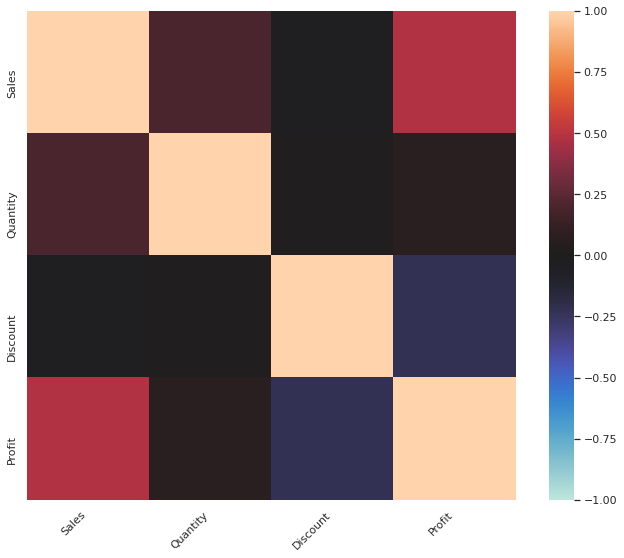

In [17]:
## Heat Map
sns.set(rc={'figure.figsize':(12,9)})
ax=sns.heatmap(cm, vmin=-1, vmax=1,center=0,square=True) #cmap=sns.diverging_palette(20,220,n=200)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')

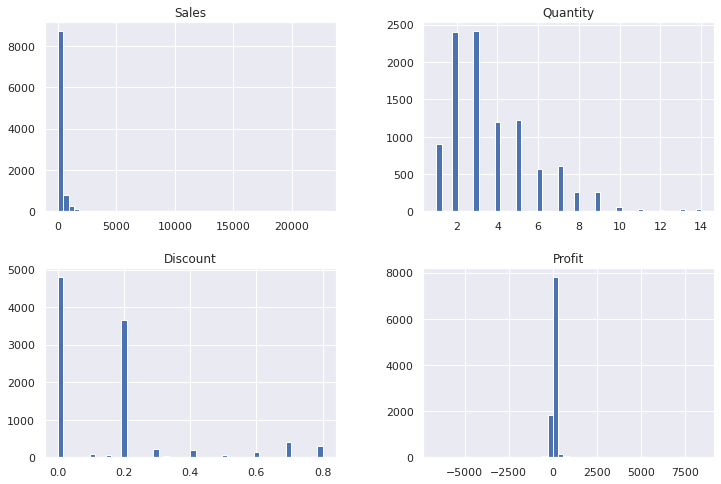

In [18]:
## Bar graphs
from matplotlib.ticker import StrMethodFormatter
numerical_data.hist(bins=50 ,figsize=(12,8))
plt.show();

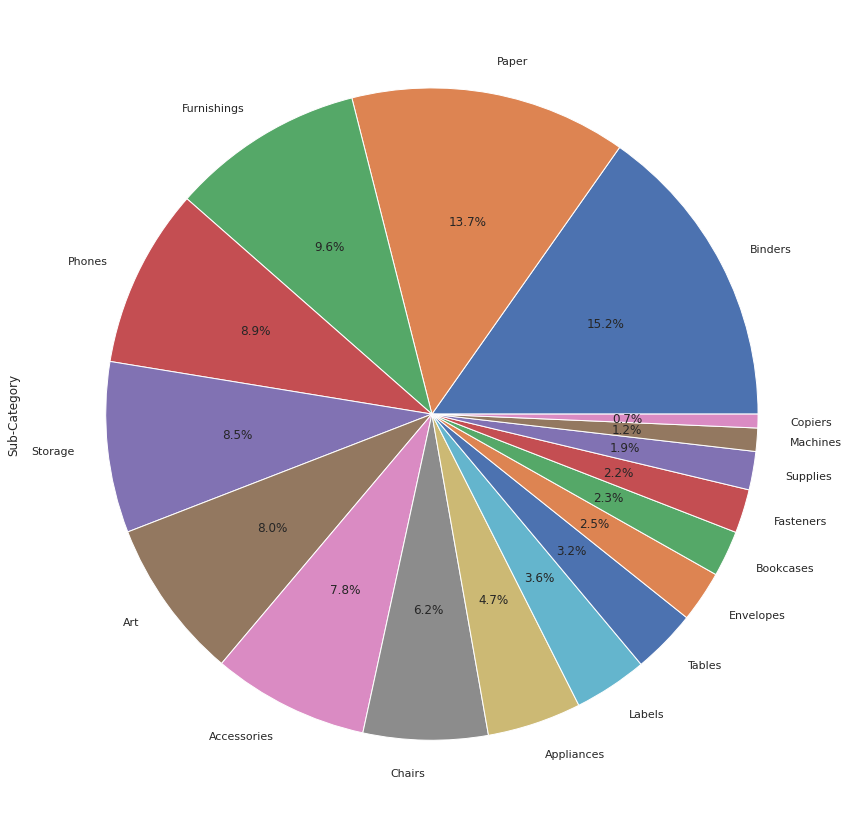

In [19]:
## Pie Chart
plt.figure(figsize=(15,15))
df['Sub-Category'].value_counts().plot.pie(autopct='%1.1f%%')

From the above pie graph the largest amount of categories are papers,blinders.

Text(0.5, 1.0, 'sales per category with its sub-category')

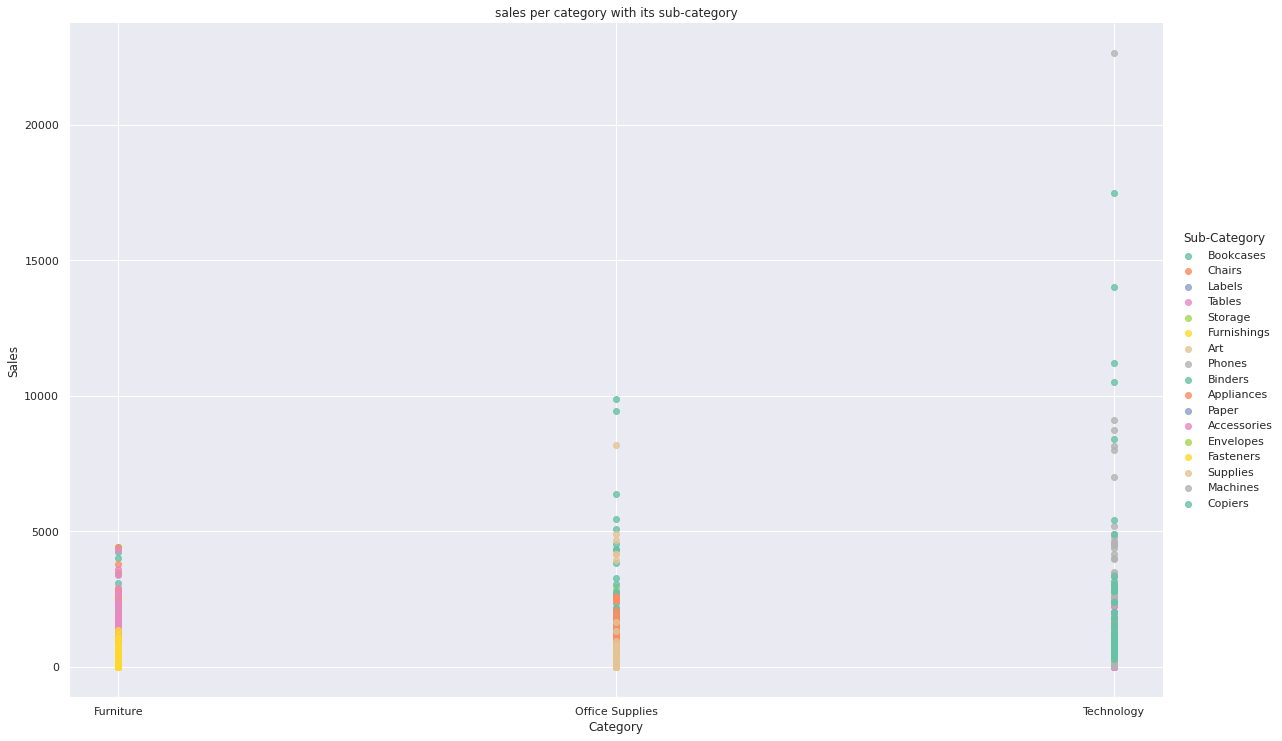

In [20]:
import warnings
warnings.filterwarnings('ignore')
sns.lmplot(x='Category',y='Sales',data=df,fit_reg=False,hue='Sub-Category',legend=True,palette='Set2',size=10,aspect=13/8)
plt.title("sales per category with its sub-category")

Therefore, Technology has the highest sales value.

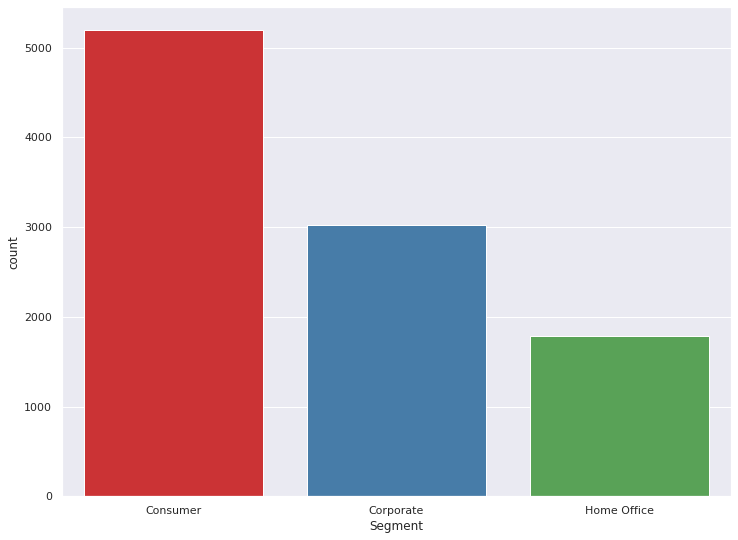

In [22]:
sns.set(style="darkgrid")
sns.countplot(x='Segment',data=df,palette='Set1')

Therefore, Consumer has maximum count.

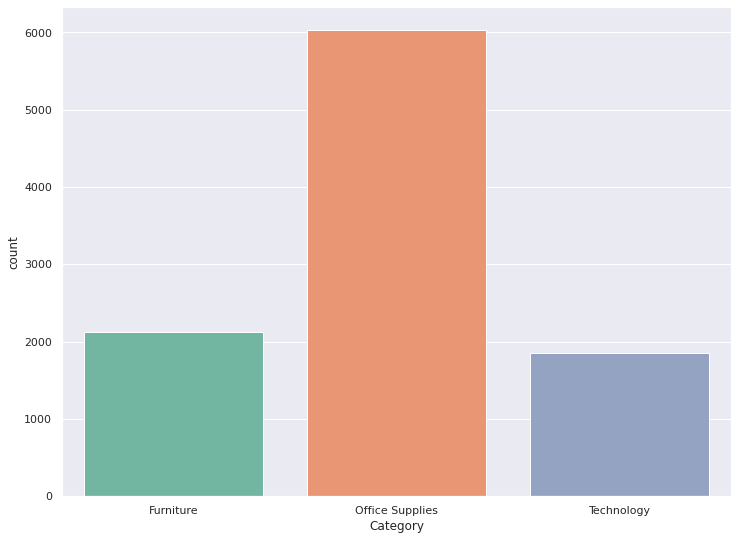

In [23]:
sns.set(style="darkgrid")
sns.countplot(x='Category',data=df,palette='Set2')

Here, office supplies have the maximum count.

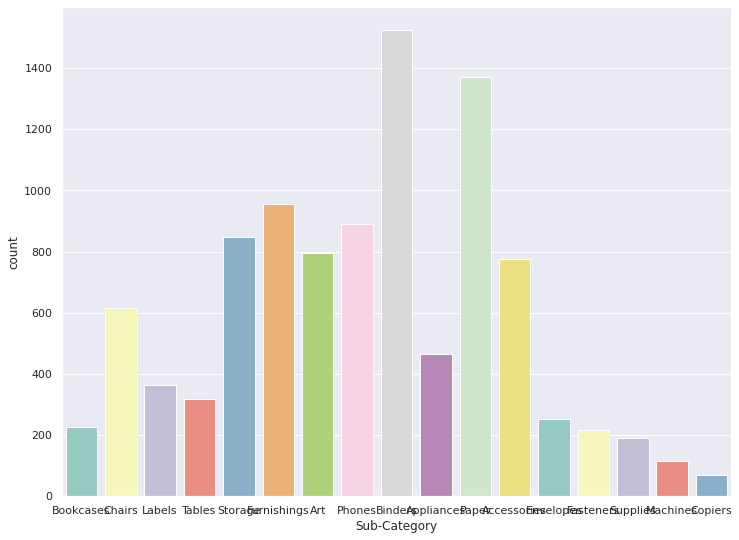

In [24]:
sns.set(style="darkgrid")
sns.countplot(x='Sub-Category',data=df,palette='Set3')

Blinders have the highest count.

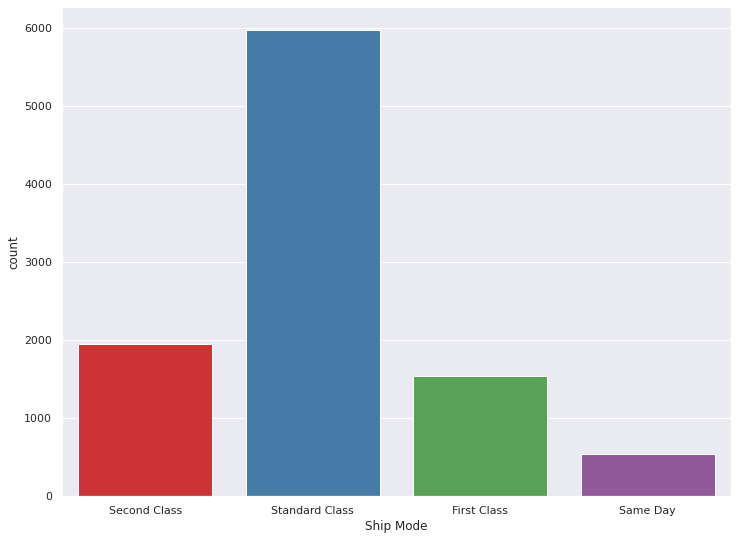

In [25]:
sns.set(style="darkgrid")
sns.countplot(x='Ship Mode',data=df,palette='Set1')

Standard class has highest count.

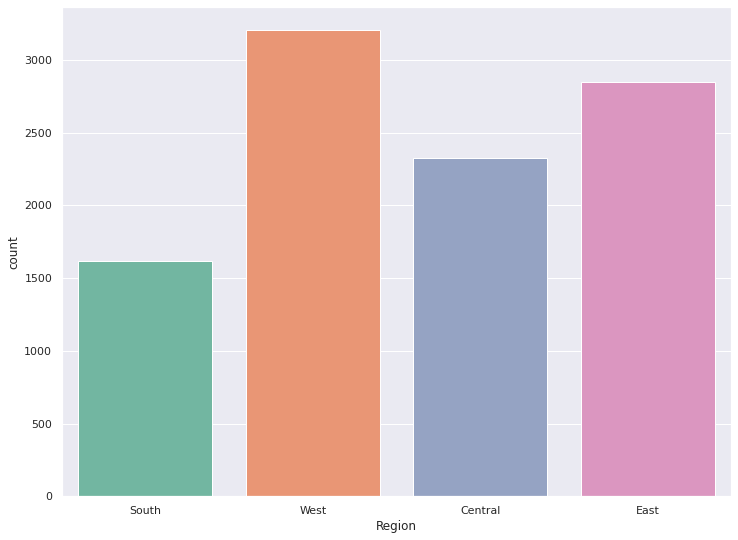

In [26]:
sns.set(style="darkgrid")
sns.countplot(x='Region',data=df,palette='Set2')

West region has the highest count.

Text(0.5, 0.98, 'profit vs sub-category')

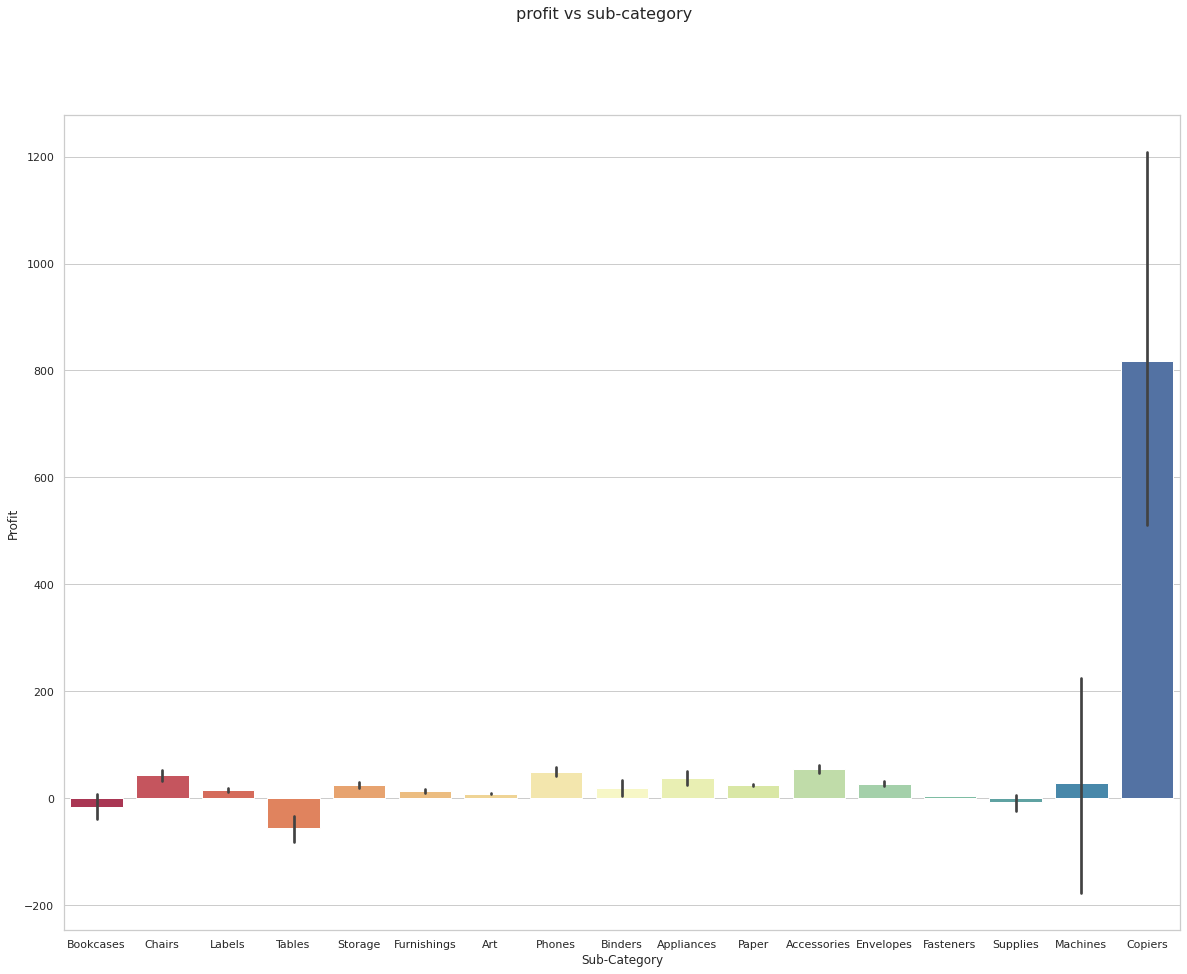

In [27]:
sns.set(style="whitegrid")
plt.figure(2, figsize=(20,15))

sns.barplot(x='Sub-Category',y='Profit', data=df, palette='Spectral')

plt.suptitle('profit vs sub-category', fontsize=16)

From this it is clear that the losses are in sub category bookcases,tables,suppliers and highest amount of profit is gained through copiers with no loss.

Highest amount of loss through tables

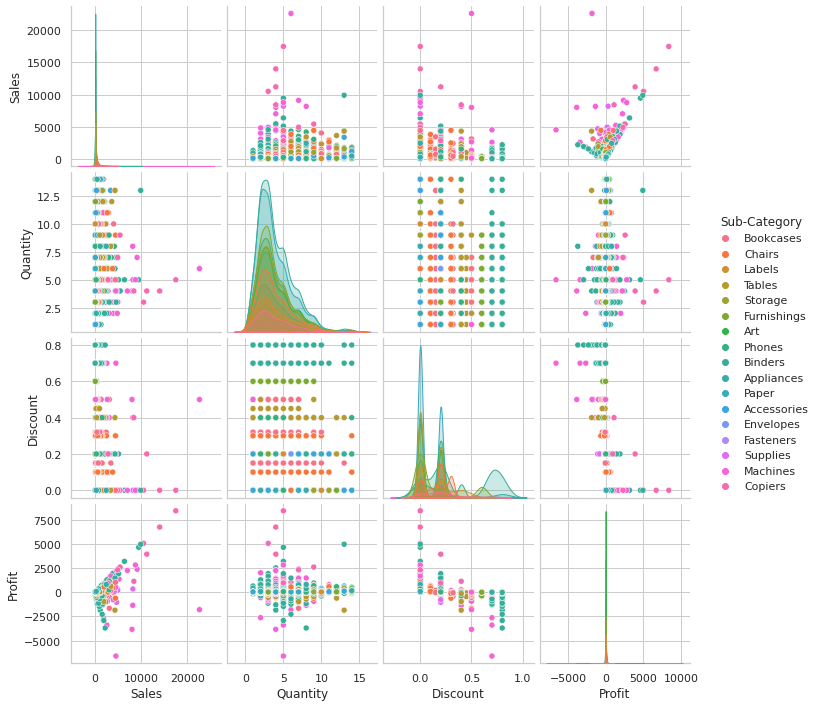

In [28]:
figsize=(15,10)
sns.pairplot(df,hue='Sub-Category')

In [29]:
## Sum,mean,min,max,count median,standard deviation,Variance of each states of Profit
df.groupby("State").Profit.agg(["sum","mean","min","max","count","median","std","var"])

,sum,mean,min,max,count,median,std,var
State,,,,,,,,
Alabama,5786.8253,94.865989,0.0000,1459.2000,61,16.87500,210.901876,44479.601429
Arizona,-3427.9246,-15.303235,-814.4832,211.4955,224,2.53365,109.266267,11939.117124
Arkansas,4008.6871,66.811452,1.4190,843.1706,60,18.34080,123.249880,15190.532873
California,76381.3871,38.171608,-325.5720,1906.4850,2001,13.30560,97.691593,9543.647400
Colorado,-6527.8579,-35.867351,-3399.9800,247.9960,182,3.12480,276.424024,76410.240842
Connecticut,3511.4918,42.823071,-15.5826,294.6710,82,12.18310,66.138081,4374.245726
Delaware,9977.3748,103.930988,-48.7839,5039.9856,96,19.19700,518.953513,269312.749126
District of Columbia,1059.5893,105.958930,4.4344,648.5624,10,14.52720,213.461353,45565.749398
Florida,-3399.3017,-8.875461,-1811.0784,327.5922,383,2.93400,126.324165,15957.794770


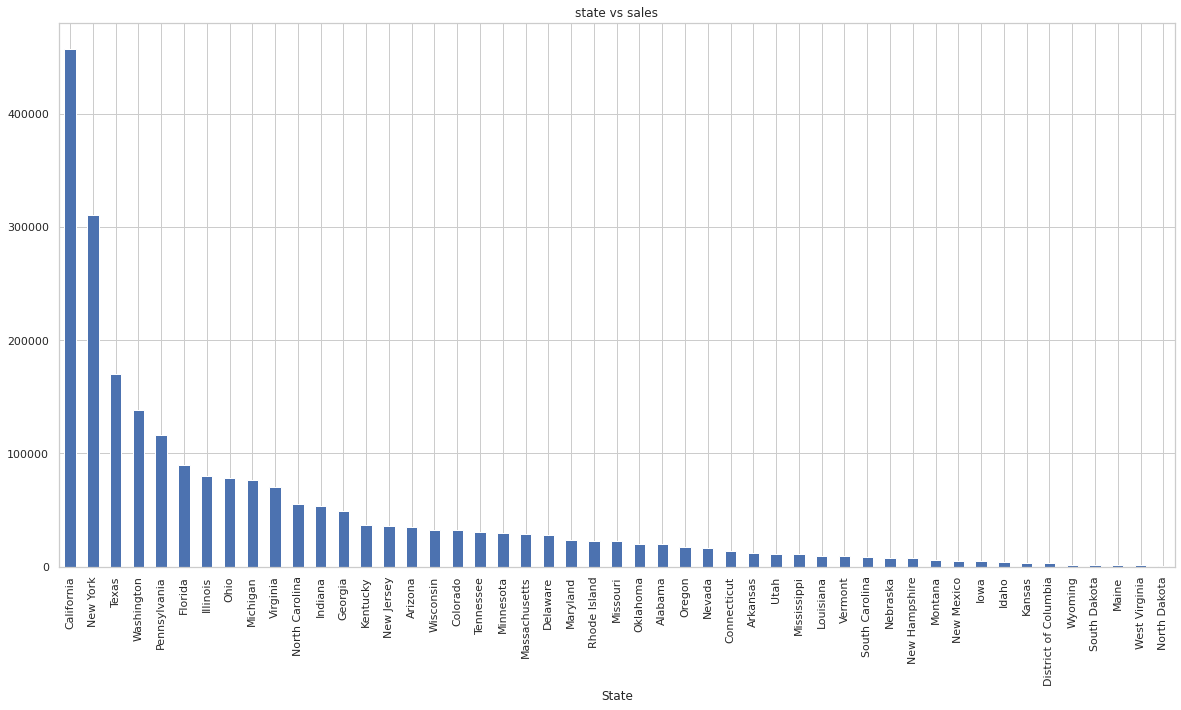

In [30]:
#statewise graph plot
stw=df.groupby(['State'])['Sales'].sum()
stw.sort_values(ascending=False,inplace=True)
fig, ax=plt.subplots(figsize=(20,10))
plt.title('state vs sales')
stw.plot.bar()

From this we can say that state of California has highest amount of sales.

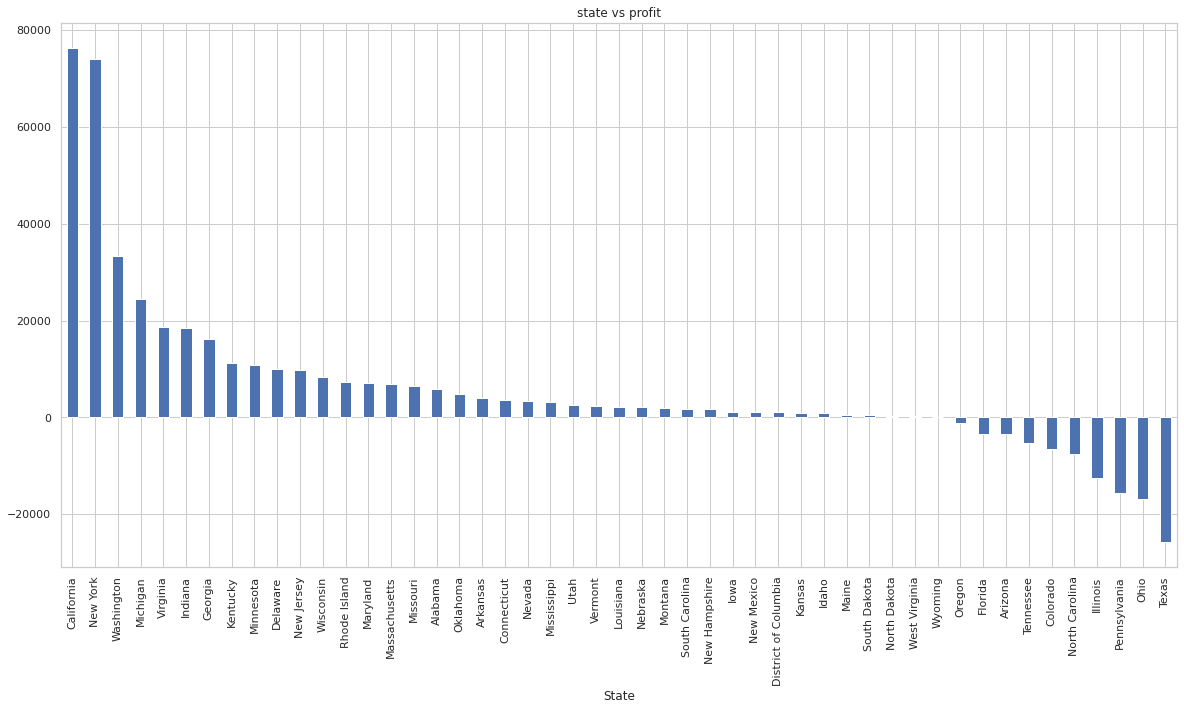

In [31]:
## Statewise graph plot
stw=df.groupby(['State'])['Profit'].sum()
stw.sort_values(ascending=False,inplace=True)
fig, ax=plt.subplots(figsize=(20,10))
plt.title('state vs profit')
stw.plot.bar()


From this we can say that state california has highest amount of profit.

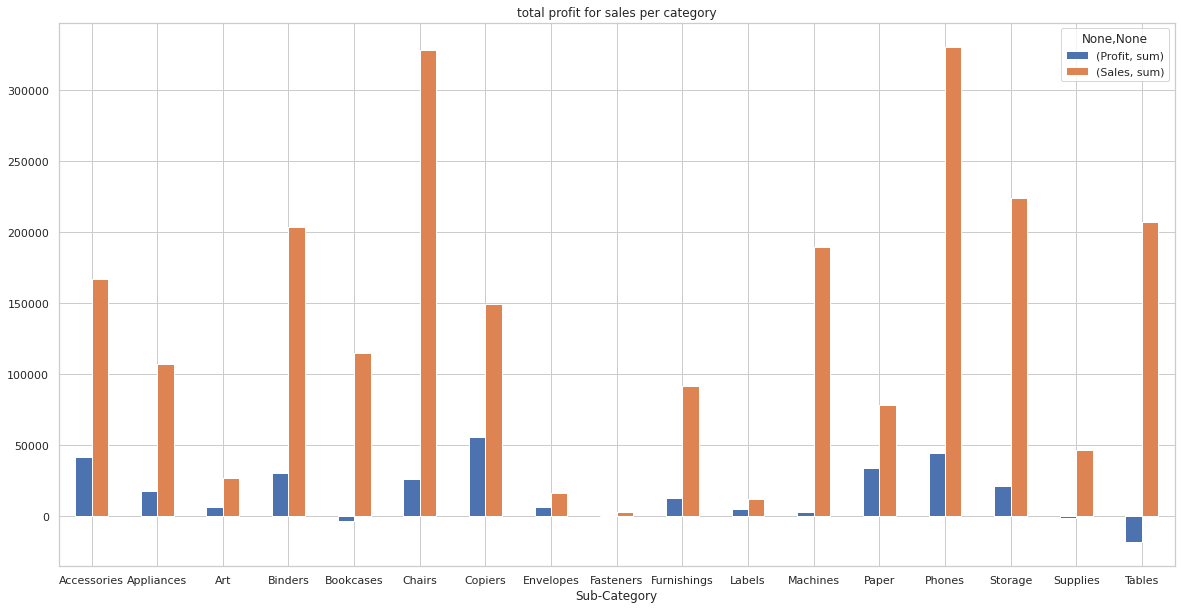

In [32]:
## Statewise graph plot
s=df.groupby(['Sub-Category'])['Profit','Sales'].agg(['sum'])
s.plot.bar(rot=0,title='total profit for sales per category',figsize=(20,10))
plt.show(block=True)

From this we can say that chairs and phones have the highest amount of sales and copiers have highest profit.

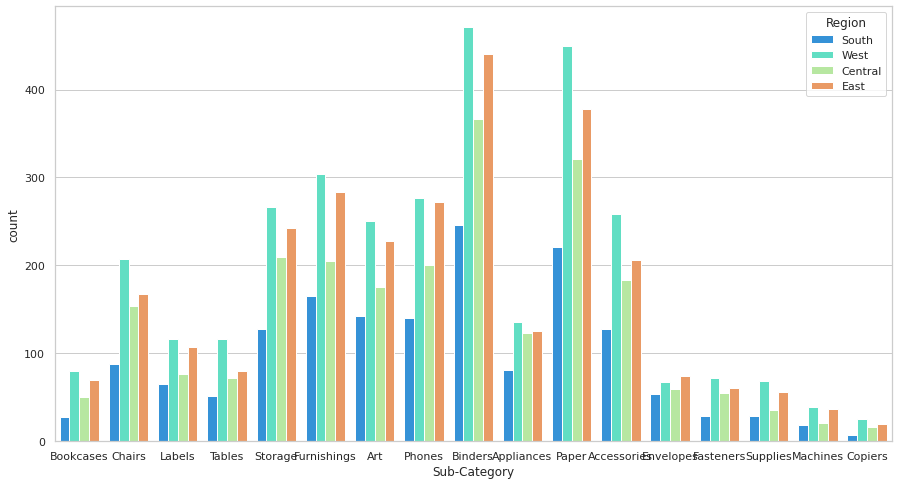

In [33]:
plt.figure(figsize=(15,8))
sns.countplot(x='Sub-Category',hue='Region',data=df,palette='rainbow')
plt.show()

From this we can see customers from particular region prefer what kinds of goods and as mentioned about there are more customers from west region compared to other regions.

##Conclusion:

Technology has highest sales,people prefer ship mode compare to other modes,corporate segment has highest count,customers from west region are more compared to other regions.